In [6]:
import pandas as pd
from google.colab import files

# Load training data
upload = files.upload()
train = pd.read_csv('train_lr.csv')

# Preview
print(train.head())
print(train.info())
print(train.isna().sum())

Saving train_lr.csv to train_lr.csv
   Age     Sex  Cholesterol  Heart Rate        BMI  Exercise Hours Per Week  \
0   21    Male          250          78  23.575795                      2.4   
1   41    Male          172          83  25.773309                      9.5   
2   45    Male          158          84  35.708303                      6.3   
3   54    Male          305          50  31.196970                     14.2   
4   68  Female          373          55  25.215830                      9.1   

   Stress Level  Systolic_BP  Diastolic_BP  Risk  
0             4          109            76     0  
1             3          134           106     0  
2             2          116            75     0  
3             9          139           108     1  
4             8          101            73     1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------           

In [11]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = train.drop('Risk', axis=1)
y = train['Risk']

# Encode 'Sex' (Male/Female) → numeric
X['Sex'] = X['Sex'].map({'Male': 0, 'Female': 1})

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

        Age       Sex  Cholesterol  Heart Rate       BMI  \
0 -1.541170 -0.659104    -0.128043    0.143436 -0.830442   
1 -0.596836 -0.659104    -1.090503    0.386156 -0.483067   
2 -0.407970 -0.659104    -1.263252    0.434700  1.087425   
3  0.016980 -0.659104     0.550615   -1.215793  0.374288   
4  0.678014  1.517212     1.389682   -0.973073 -0.571191   

   Exercise Hours Per Week  Stress Level  Systolic_BP  Diastolic_BP  
0                -1.316958     -0.511040    -0.985628     -0.619998  
1                -0.091195     -0.859861    -0.035145      1.421616  
2                -0.643652     -1.208683    -0.719492     -0.688052  
3                 0.720225      1.233065     0.154952      1.557724  
4                -0.160252      0.884244    -1.289782     -0.824160  


In [12]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print("Train:", X_train.shape, "Validation:", X_valid.shape)

Train: (5608, 9) Validation: (1402, 9)


In [13]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
model = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Accuracy: 0.5028530670470756
Precision: 0.3609129814550642
Recall: 0.5039840637450199
F1-score: 0.42061512884455526


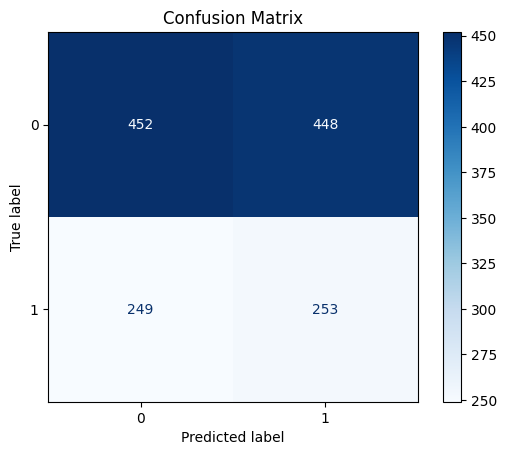

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_valid)

# Performance metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion matrix visualization
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Load test data
upload = files.upload()
test = pd.read_csv('test_lr.csv')

# Encode 'Sex' as in train set
test['Sex'] = test['Sex'].map({'Male': 0, 'Female': 1})

# Scale and convert back to DataFrame with correct columns
test_scaled = scaler.transform(test)
test_scaled_df = pd.DataFrame(test_scaled, columns=X.columns)

# Generate predictions
y_test_pred = model.predict(test_scaled_df)

# Convert prediction to Yes/No
risk_map = {1: 'Yes', 0: 'No'}
y_test_pred_text = pd.Series(y_test_pred).map(risk_map)


Saving test_lr.csv to test_lr (1).csv


In [26]:
upload = files.upload()
sample = pd.read_csv('sample_submission (1).csv')

sample['Risk'] = y_test_pred_text
sample.to_csv('submission.csv', index=False)
print(sample.head())

Saving sample_submission (1).csv to sample_submission (1) (1).csv
  Risk
0   No
1   No
2  Yes
3   No
4  Yes


In [27]:
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>